In [1]:
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
#from sklearn.cross_validation import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

Using TensorFlow backend.


In [2]:
data_w = pd.read_csv('weather/weather_new.csv', parse_dates={'dt' : ['Unnamed: 0']}, infer_datetime_format=True,)

In [3]:
data_w.shape

(2592000, 13)

In [4]:
data_w

,dt,Unnamed: 0.1,Weather_Station.Wind_Direction,Weather_Station.Wind_Speed,Weather_Station.Pressure,Weather_Station.Humidity,Weather_Station.Temperature,Weather_Station.Dewpoint,Weather_Station.Global_Irradiance,Weather_Station.Diffused_Irradiance,Weather_Station.Rain,Weather_Station.Supply_Voltage,Weather_Station.Status
0,0,2016-09-01 10:00:00.300,185.0,1.86,1006.3,49.5,29.9,18.2,230.6,186.1,0.0,11.8,0.0
1,1,2016-09-01 10:00:01.300,165.0,1.38,1006.3,49.4,29.9,18.2,230.1,187.8,0.0,11.8,0.0
2,2,2016-09-01 10:00:02.300,164.0,1.78,1006.3,49.4,29.9,18.2,231.4,185.6,0.0,11.8,0.0
3,3,2016-09-01 10:00:03.300,154.0,1.19,1006.3,49.5,29.9,18.2,232.2,188.9,0.0,11.8,0.0
4,4,2016-09-01 10:00:04.300,155.0,2.82,1006.3,49.5,29.9,18.2,232.6,190.6,0.0,11.8,0.0
5,5,2016-09-01 10:00:05.300,154.0,2.85,1006.3,49.5,29.9,18.2,233.2,190.4,0.0,11.8,0.0
6,6,2016-09-01 10:00:06.300,162.0,2.99,1006.3,49.6,29.9,18.2,231.5,186.9,0.0,11.8,0.0
7,7,2016-09-01 10:00:07.300,156.0,2.55,1006.3,49.6,29.9,18.2,235.6,190.3,0.0,11.8,0.0
8,8,2016-09-01 10:00:08.300,160.0,1.93,1006.3,49.6,29.9,18.2,236.3,193.5,0.0,11.8,0.0
9,9,2016-09-01 10:00:09.300,154.0,1.39,1006.3,49.6,29.9,18.2,237.9,188.5,0.0,11.8,0.0


In [5]:
data_w.columns

Index(['dt', 'Unnamed: 0.1', 'Weather_Station.Wind_Direction',
       'Weather_Station.Wind_Speed', 'Weather_Station.Pressure',
       'Weather_Station.Humidity', 'Weather_Station.Temperature',
       'Weather_Station.Dewpoint', 'Weather_Station.Global_Irradiance',
       'Weather_Station.Diffused_Irradiance', 'Weather_Station.Rain',
       'Weather_Station.Supply_Voltage', 'Weather_Station.Status'],
      dtype='object')

In [6]:
data_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592000 entries, 0 to 2591999
Data columns (total 13 columns):
dt                                     object
Unnamed: 0.1                           object
Weather_Station.Wind_Direction         float64
Weather_Station.Wind_Speed             float64
Weather_Station.Pressure               float64
Weather_Station.Humidity               float64
Weather_Station.Temperature            float64
Weather_Station.Dewpoint               float64
Weather_Station.Global_Irradiance      float64
Weather_Station.Diffused_Irradiance    float64
Weather_Station.Rain                   float64
Weather_Station.Supply_Voltage         float64
Weather_Station.Status                 float64
dtypes: float64(11), object(2)
memory usage: 257.1+ MB


In [7]:
data_i = pd.read_csv('Inver/inverter_new.csv')

In [8]:
data_i

,Unnamed: 0,Total Net Instantaneous Real Power (kW)
0,0,-0.021
1,1,-0.021
2,2,-0.021
3,3,-0.020
4,4,-0.019
5,5,-0.019
6,6,-0.019
7,7,-0.019
8,8,-0.019
9,9,-0.019


In [11]:
for j in range(1,12):
       print(data_w.iloc[:, j].unique())

['2016-09-01 10:00:00.300' '2016-09-01 10:00:01.300'
 '2016-09-01 10:00:02.300' ... '30:19.7' '42:19.7' nan]
[185. 165. 164. 154. 155. 162. 156. 160. 180. 150. 166. 158. 189. 173.
 188. 170. 153. 147. 148. 145. 149. 168. 182. 178. 190. 181. 223. 225.
 239. 226. 244. 243. 232. 236. 251. 254. 278. 279. 269. 266. 250. 240.
 230. 229. 248. 268. 262. 235. 245. 246. 221. 218. 211. 234. 204. 217.
 228. 214. 216. 227. 224. 200. 199. 203. 201. 220. 177. 141. 131. 108.
 219. 241. 212. 233. 186. 191. 163. 157. 169. 140. 167. 205. 208. 176.
 192. 195. 196. 159. 197. 215. 183. 209. 151. 175.  14. 252. 249. 198.
 210. 222. 238. 253. 231. 237. 257. 255. 256. 288. 273. 261. 258. 259.
 142. 213. 187. 206. 174. 137. 138. 152. 143. 161. 128. 179. 194. 118.
  97. 247. 242. 184. 171. 271. 272. 267. 260. 265. 264. 263. 275. 207.
 202. 193. 320. 314.  63. 315. 270. 121. 146. 130. 311. 287. 280. 277.
 276. 274. 299. 284. 286. 295.  69.  29.  58.  93. 144. 139. 172. 298.
 296.  70. 325. 132. 136. 124. 127. 135

In [12]:
data_w.isnull()

,dt,Unnamed: 0.1,Weather_Station.Wind_Direction,Weather_Station.Wind_Speed,Weather_Station.Pressure,Weather_Station.Humidity,Weather_Station.Temperature,Weather_Station.Dewpoint,Weather_Station.Global_Irradiance,Weather_Station.Diffused_Irradiance,Weather_Station.Rain,Weather_Station.Supply_Voltage,Weather_Station.Status
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
data_i.describe()

,Unnamed: 0,Total Net Instantaneous Real Power (kW)
count,2.551326e+06,2.551297e+06
mean,4.252160e+04,1.454839e+00
std,2.455015e+04,2.124276e+00
min,0.000000e+00,-4.700000e-02
25%,2.126100e+04,-2.000000e-02
50%,4.252200e+04,-1.500000e-02
75%,6.378300e+04,2.563000e+00
max,8.505300e+04,1.010500e+01


In [14]:
data_w.describe()

,Weather_Station.Wind_Direction,Weather_Station.Wind_Speed,Weather_Station.Pressure,Weather_Station.Humidity,Weather_Station.Temperature,Weather_Station.Dewpoint,Weather_Station.Global_Irradiance,Weather_Station.Diffused_Irradiance,Weather_Station.Rain,Weather_Station.Supply_Voltage,Weather_Station.Status
count,2.591845e+06,2.591983e+06,2.591982e+06,2.591982e+06,2.591981e+06,2.591981e+06,2.591982e+06,2.591982e+06,2.591982e+06,2.591980e+06,2591981.0
mean,1.661296e+02,1.869047e+00,1.006855e+03,6.586551e+01,2.630217e+01,1.914434e+01,2.543064e+02,8.158252e+01,3.135824e-06,1.172844e+01,0.0
std,1.105353e+02,1.448685e+00,8.378876e+00,1.155237e+01,2.920205e+00,1.854492e+00,3.566313e+02,1.129624e+02,8.924628e-04,3.394563e-01,0.0
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,6.800000e+01,8.700000e-01,1.006000e+03,5.780000e+01,2.380000e+01,1.790000e+01,3.900000e+00,2.800000e+00,0.000000e+00,1.180000e+01,0.0
50%,1.570000e+02,1.450000e+00,1.007000e+03,6.670000e+01,2.600000e+01,1.890000e+01,1.130000e+01,1.030000e+01,0.000000e+00,1.180000e+01,0.0
75%,2.670000e+02,2.440000e+00,1.007800e+03,7.420000e+01,2.870000e+01,2.080000e+01,4.345000e+02,1.246000e+02,0.000000e+00,1.180000e+01,0.0
max,3.590000e+02,1.564000e+01,1.010200e+03,9.170000e+01,3.440000e+01,2.430000e+01,1.571900e+03,5.901000e+02,2.540000e-01,1.180000e+01,0.0


In [13]:
droping_list_all=[]
for j in range(0,12):
    if not data_w.iloc[:, j].notnull().all():
        droping_list_all.append(j)        
        #print(df.iloc[:,j].unique())
droping_list_all

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [ ]:
data_w.dropna(inplace= True)

In [15]:
data_i.isnull()

,Unnamed: 0,Total Net Instantaneous Real Power (kW)
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [35]:
def series_to_supervised(data_i, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data_i) is list else data_i.shape[1]
	dff = pd.DataFrame(data_i)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [36]:
data_i.isnull().sum()

Unnamed: 0                                  0
Total Net Instantaneous Real Power (kW)    29
dtype: int64

In [17]:
data_i.isnull().sum()

Unnamed: 0                                  0
Total Net Instantaneous Real Power (kW)    29
dtype: int64

In [37]:
values = data_i.values

# integer encode direction
# ensure all data is float
#values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[0]], axis=1, inplace=True)
print(reframed.head())

   var2(t-1)   var1(t)   var2(t)
1   0.002561  0.000012  0.002561
2   0.002561  0.000024  0.002561
3   0.002561  0.000035  0.002660
4   0.002660  0.000047  0.002758
5   0.002758  0.000059  0.002758


In [38]:
# split into train and test sets
values = reframed.values

n_train_time = 24*60*60*20
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(1728000, 1, 2) (1728000,) (823294, 1, 2) (823294,)


Train on 1728000 samples, validate on 823294 samples
Epoch 1/20
 - 69s - loss: 3.5115e-04 - acc: 1.1574e-06 - val_loss: 2.0866e-04 - val_acc: 0.0000e+00
Epoch 2/20
 - 72s - loss: 2.1342e-04 - acc: 1.1574e-06 - val_loss: 3.0798e-04 - val_acc: 0.0000e+00
Epoch 3/20
 - 71s - loss: 2.0972e-04 - acc: 1.1574e-06 - val_loss: 3.9296e-04 - val_acc: 0.0000e+00
Epoch 4/20
 - 70s - loss: 2.0571e-04 - acc: 1.1574e-06 - val_loss: 4.8872e-04 - val_acc: 0.0000e+00
Epoch 5/20
 - 70s - loss: 2.0506e-04 - acc: 1.1574e-06 - val_loss: 5.9675e-04 - val_acc: 0.0000e+00
Epoch 6/20
 - 70s - loss: 2.0169e-04 - acc: 1.1574e-06 - val_loss: 6.2750e-04 - val_acc: 0.0000e+00
Epoch 7/20
 - 77s - loss: 2.0375e-04 - acc: 1.1574e-06 - val_loss: 6.6816e-04 - val_acc: 0.0000e+00
Epoch 8/20
 - 79s - loss: 2.0247e-04 - acc: 1.1574e-06 - val_loss: 6.8694e-04 - val_acc: 0.0000e+00
Epoch 9/20
 - 79s - loss: 1.9924e-04 - acc: 1.1574e-06 - val_loss: 7.0982e-04 - val_acc: 0.0000e+00
Epoch 10/20
 - 78s - loss: 1.9882e-04 - acc: 1.

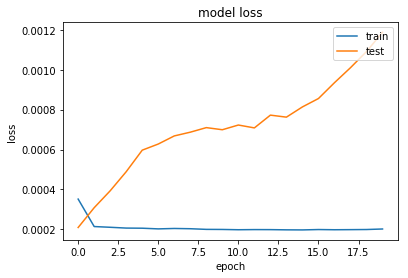

Test RMSE: 2932.104


In [39]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['accuracy'])



# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 2))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)